https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'

dataframe = pd.read_csv( url , header = None , na_values = '?' )

In [5]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [16]:
# % NaN par colonne :

100 * ( dataframe.isna().sum( axis = 0 ) / dataframe.shape[0] )

0      0.333333
1      0.000000
2      0.000000
3     20.000000
4      8.000000
5     19.333333
6     18.666667
7     23.000000
8     15.666667
9     10.666667
10    18.333333
11    14.666667
12    18.666667
13    34.666667
14    35.333333
15    82.333333
16    34.000000
17    39.333333
18     9.666667
19    11.000000
20    55.000000
21    66.000000
22     0.333333
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
dtype: float64

In [19]:
data = dataframe.values

X = data[ : , : -1 ]

y = data[ : , -1 ]

print( X.shape )

print( y.shape )

(300, 27)
(300,)


# IterativeImputer and Model Evaluation

In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline

In [24]:
model = RandomForestClassifier()

imputer = IterativeImputer()


steps = [ ( 'step_imputer' , imputer ) , 
          ( 'step_model' , model ) ]

pipeline = Pipeline( steps = steps )

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

from numpy import mean

from numpy import std

In [27]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

scores = cross_val_score( pipeline , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

print( f'accuracy : {mean(scores):.3f} ( {std(scores):.3f} )' )

accuracy : 0.793 ( 0.063 )


# IterativeImputer and Different Imputation Order

In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline

In [36]:
def get_models( ) :
    
    models = dict()

    strategies = [ 'ascending' , 'descending' , 'roman' , 'arabic' , 'random' ]
    

    for s in strategies :

        imputer = IterativeImputer( imputation_order = s )
        
        model = RandomForestClassifier()
        
        
        steps = [ ( 'step_imputer' , imputer ) , 
                  ( 'step_model' , model ) ]

        models[ 'model_imputation_order_' + s ] = Pipeline( steps = steps )

    return models

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [38]:
def evaluate_model( model ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [39]:
from numpy import mean

from numpy import std

In [40]:
models = get_models( )

results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( model )
    
    results.append( scores )
    
    print( f'{name} : accuracy : {mean(scores):.3f} ( {std(scores):.3f})' ) 

model_imputation_order_ascending : accuracy : 0.791 ( 0.058)
model_imputation_order_descending : accuracy : 0.798 ( 0.068)
model_imputation_order_roman : accuracy : 0.797 ( 0.062)
model_imputation_order_arabic : accuracy : 0.811 ( 0.063)
model_imputation_order_random : accuracy : 0.794 ( 0.052)


In [41]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x6747b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbbea20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb2f588>,
 'medians': [<matplotlib.lines.Line2D at 0x1cbbee48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cc05780>,
 'means': [<matplotlib.lines.Line2D at 0x1cc05438>,
  <matplotlib.lines.Line2D at 0x1ce48ef0>]}

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

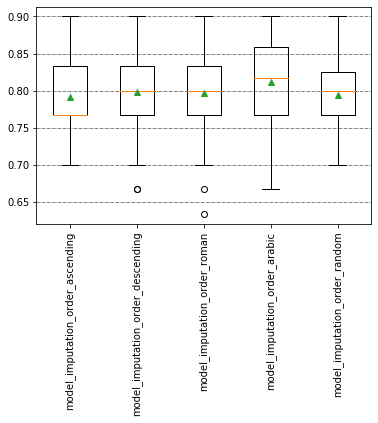

In [42]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()

# IterativeImputer and Different Number of Iterations

In [43]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline

In [49]:
def get_models( ) :
    
    models = dict()
    
    strategies = [ i for i in range( 1 , 21 ) ]

    for s in strategies :

        imputer = IterativeImputer( max_iter = s )
        
        model = RandomForestClassifier()
        
        
        steps = [ ( 'step_imputer' , imputer ) , 
                  ( 'step_model' , model ) ]

        models[ 'model_max_iter_' + str( s ) ] = Pipeline( steps = steps )

    return models

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [51]:
def evaluate_model( model ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    
    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [52]:
from numpy import mean

from numpy import std

In [53]:
models = get_models( )

results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( model )
    
    results.append( scores )
    
    print( f'{name} : accuracy : {mean(scores):.3f} ( {std(scores):.3f})' ) 

model_max_iter_1 : accuracy : 0.801 ( 0.059)
model_max_iter_2 : accuracy : 0.801 ( 0.060)
model_max_iter_3 : accuracy : 0.796 ( 0.073)
model_max_iter_4 : accuracy : 0.797 ( 0.060)
model_max_iter_5 : accuracy : 0.803 ( 0.059)
model_max_iter_6 : accuracy : 0.812 ( 0.063)
model_max_iter_7 : accuracy : 0.786 ( 0.061)
model_max_iter_8 : accuracy : 0.801 ( 0.053)
model_max_iter_9 : accuracy : 0.791 ( 0.054)
model_max_iter_10 : accuracy : 0.792 ( 0.061)
model_max_iter_11 : accuracy : 0.797 ( 0.053)
model_max_iter_12 : accuracy : 0.794 ( 0.072)
model_max_iter_13 : accuracy : 0.799 ( 0.053)
model_max_iter_14 : accuracy : 0.790 ( 0.064)
model_max_iter_15 : accuracy : 0.803 ( 0.068)
model_max_iter_16 : accuracy : 0.801 ( 0.068)
model_max_iter_17 : accuracy : 0.801 ( 0.056)
model_max_iter_18 : accuracy : 0.803 ( 0.056)
model_max_iter_19 : accuracy : 0.791 ( 0.054)
model_max_iter_20 : accuracy : 0.797 ( 0.061)


In [54]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce98208>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0b2da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce98b00>,
 'medians': [<matplotlib.lines.Line2D at 0x1d0b2208>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cb88470>,
 'means': [<matplotlib.lines.Line2D at 0x1d0b2630>,
  <matplotlib.lines.Line2D at 0x1d049fd0>]}

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

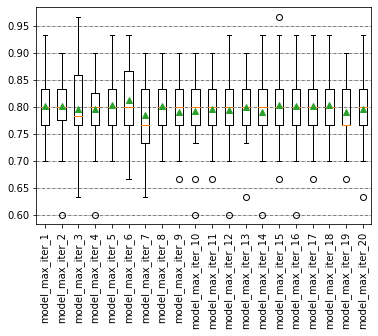

In [55]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()